Contacts: 
Email: asfour.omar9@gmail.com
LinkedIn: https://www.linkedin.com/in/omar-asfour/
GitHub: https://github.com/oasfour00

Hello!

Thank you for taking the time to review my project.
This is an exploratory data analysis and visualisation of failed banks. The data is from this website https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/
This project is mainly to show an example of the kind of work that I can do, but it is also a great way to practice what I have been learning and provide useful data.

Please let me know what you think of this small project!

In [135]:
#Importing Seaborn and Pandas, as well as importing our data and assigning them to variables
#This data is from October 13, 2000 to October 23, 2020

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')
data2 = pd.read_csv('C:\\Users\\Omar\\Downloads\\bank-data.csv')

failed_banks_df = data[0]
failed_banks_df

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534
...,...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


In [136]:
#Renaming the columns to make them easier to read at a glance, as well as to help with calling them later.
fbdf = failed_banks_df.rename(columns = {'Bank NameBank' : 'BANK_NAME', 'CityCity':'CITY', 'StateSt':'STATE', 'CertCert':'CERT', 'Acquiring InstitutionAI':'ACQUIRING_INST', 'Closing DateClosing':'CLOSE_DATE','FundFund' : 'FUND_NUM'})
fbdf

,BANK_NAME,CITY,STATE,CERT,ACQUIRING_INST,CLOSE_DATE,FUND_NUM
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534
...,...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


In [137]:
#This Dataframe was created from the data in Data 2. There are two dataframes because the first one was missing important columns such as est_loss, total_assets, and total_deposits, so I decided to merge the two.
#Here, I drop useless columns from Dataframe 2, as well as renaming the existing columns to be more understandable. I kept the CERT column as an anchor to join the dataframes later.

failed_bank_df2 = data2.drop(['CHCLASS1', 'CITYST', 'FIN', 'ID', 'NAME', 'RESTYPE1', 'SAVR', 'RESTYPE', 'FAILDATE'], axis = 1)
fbdf2 = failed_bank_df2.rename(columns = {'COST':'EST_LOSS', 'QBFASSET':'TOTAL_ASSETS', 'QBFDEP' : 'TOTAL_DEPOSITS'})
fbdf2

,CERT,EST_LOSS,TOTAL_ASSETS,TOTAL_DEPOSITS
0,15426,16806.0,65733,64941
1,16748,7247.0,136566,133936
2,14361,45913.0,151808,143102
3,18265,25293.0,100879,95159
4,21111,1946.0,120574,111234
...,...,...,...,...
576,338,14592.0,85485,77140
577,10985,1363.0,25942,26667
578,25056,617.0,7923,7680
579,27886,1322.0,31479,32234


In [138]:
#Merging both Dataframes on the CERT column. Now we can do some explortory analysis
fbdf_all = fbdf.merge(fbdf2.drop_duplicates(), on=['CERT'], how='left', indicator=True)
fbdf_all

,BANK_NAME,CITY,STATE,CERT,ACQUIRING_INST,CLOSE_DATE,FUND_NUM,EST_LOSS,TOTAL_ASSETS,TOTAL_DEPOSITS,_merge
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538,16806.0,65733,64941,both
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537,7247.0,136566,133936,both
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536,45913.0,151808,143102,both
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535,25293.0,100879,95159,both
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534,1946.0,120574,111234,both
...,...,...,...,...,...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004,286673.0,1765455,1609501,both
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648,769.0,9075,8728,both
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647,817.0,17438,16931,both
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646,2670.0,90397,71277,both


In [139]:
#I want to see which cities had the most failed banks
#To see this data, we can count the amount of times that a city shows up in this database, because each row is a unique bank.
#Therefore, the amount of times a city shows up in this database is equivalent to the amount of banks that failed in that city

fbdf_all['STATE'].value_counts()

GA    93
FL    76
IL    69
CA    41
MN    23
WA    19
AZ    16
MO    16
MI    14
TX    13
NV    12
KS    11
WI    11
SC    10
CO    10
MD    10
PA    10
OH     9
NJ     8
UT     8
NC     7
AL     7
OK     7
TN     7
OR     6
VA     5
NY     5
PR     4
AR     4
LA     4
NE     4
NM     3
IN     3
KY     3
WV     2
IA     2
MS     2
CT     2
ID     2
MA     1
SD     1
WY     1
NH     1
HI     1
Name: STATE, dtype: int64

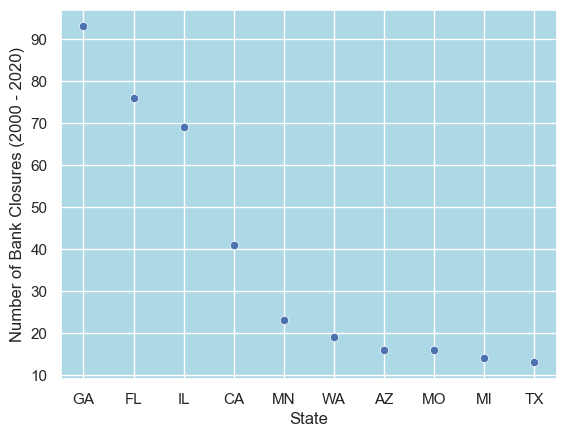

In [157]:
#Plotting top 10 most bank closures.
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
closure_values = fbdf_all['STATE'].value_counts().head(10)
scatterplot1 = sns.scatterplot(closure_values)
scatterplot1.set_xlabel('State')
scatterplot1.set_ylabel('Number of Bank Closures (2000 - 2020)')
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [141]:
#This is a large dataframe with tons of rows.
#We can quickly grab specific columns based on ceratin conditions we can set.

fbdf_all

,BANK_NAME,CITY,STATE,CERT,ACQUIRING_INST,CLOSE_DATE,FUND_NUM,EST_LOSS,TOTAL_ASSETS,TOTAL_DEPOSITS,_merge
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538,16806.0,65733,64941,both
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537,7247.0,136566,133936,both
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536,45913.0,151808,143102,both
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535,25293.0,100879,95159,both
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534,1946.0,120574,111234,both
...,...,...,...,...,...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004,286673.0,1765455,1609501,both
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648,769.0,9075,8728,both
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647,817.0,17438,16931,both
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646,2670.0,90397,71277,both


In [142]:
#Bank in this dataframe which lost the most money.
fbdf_all[fbdf_all['EST_LOSS'] == fbdf_all['EST_LOSS'].max()]

,BANK_NAME,CITY,STATE,CERT,ACQUIRING_INST,CLOSE_DATE,FUND_NUM,EST_LOSS,TOTAL_ASSETS,TOTAL_DEPOSITS,_merge
531,IndyMac Bank,Pasadena,CA,29730,"OneWest Bank, FSB","July 11, 2008",10007,12040084.0,30698512,18941727,both


In [143]:
#Bank in this dataframe which had the most assets at the time of its bankruptcy
fbdf_all[fbdf_all['TOTAL_ASSETS'] == fbdf_all['TOTAL_ASSETS'].max()]

,BANK_NAME,CITY,STATE,CERT,ACQUIRING_INST,CLOSE_DATE,FUND_NUM,EST_LOSS,TOTAL_ASSETS,TOTAL_DEPOSITS,_merge
523,Washington Mutual Bank (Including its subsidia...,Henderson,NV,32633,JP Morgan Chase Bank,"September 25, 2008",10015,0.0,307021614,188260793,both


In [144]:
#Bank in this dataframe which had the most deposits at the time of its bankruptcy
fbdf_all[fbdf_all['TOTAL_DEPOSITS'] == fbdf_all['TOTAL_DEPOSITS'].max()]

,BANK_NAME,CITY,STATE,CERT,ACQUIRING_INST,CLOSE_DATE,FUND_NUM,EST_LOSS,TOTAL_ASSETS,TOTAL_DEPOSITS,_merge
523,Washington Mutual Bank (Including its subsidia...,Henderson,NV,32633,JP Morgan Chase Bank,"September 25, 2008",10015,0.0,307021614,188260793,both


<AxesSubplot: xlabel='Years', ylabel='Months'>

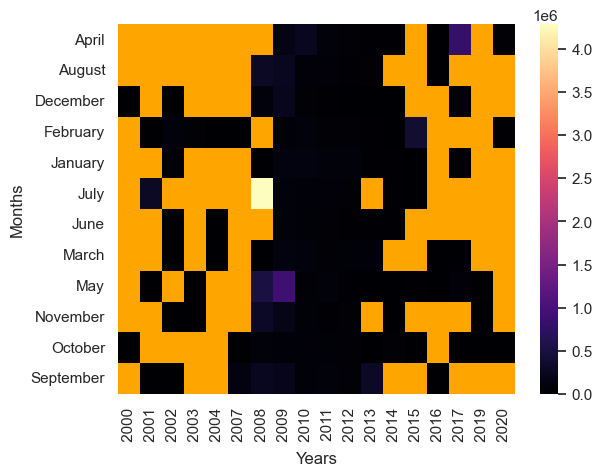

In [155]:
#Now, I want to create a heatmap with the data from fbdf_all. The x-axis will be the years, the y-axis will be the months, and the values will be the est_loss of the banks.
#There is an issue though, the value for the date in our dataframe is a string in the format "day month, year". We need to split these into the month and the year to plot them
#To do this, I split the value at the ",". For October 23, 2000, this would return 2 values: 'October 23' and '2000'. I went through all values and appended the year to a list called year_col
#I did the same for the months, except I split the value on the space. 23 October, 2000 will return the values 'October', '23,' and '2000'. I appended the first value, which always included the month, to the months_col.
#I then merged the month col, year col, and est_loss col into a new dataframe which I created the heatmap with.



#Splitting the CLOSE_DATE Column into months and years to more easily visualize. Create a mini dataframe with three lists and make a pivot table out of them. 

year_col = []
month_col = []
est_loss_col = []


for value in fbdf_all['CLOSE_DATE']:
    year_col.append(value.split(',')[1])

for value in fbdf_all['CLOSE_DATE']:
    month_col.append(value.split(' ')[0])

for value in fbdf_all['EST_LOSS']:
    est_loss_col.append((value))

#Creating a Dataframe with our new year, month, and est_loss columns.
df1 = pd.DataFrame({'Years': year_col, 'Months': month_col,'Est_Loss': est_loss_col})

#Creating the heatmap. Note that Orange values are null, in which there were no bank closures in that time.
sns.set(rc={'axes.facecolor':'orange'})

heatmap_data = df1.pivot_table(index = 'Months', columns = 'Years', values = 'Est_Loss')

sns.heatmap(heatmap_data, cmap = 'magma')

In [ ]:
#From this data, we can see that banks closed much more frequently between the years of 2008-2013. 
#This is interensting, as this was the exact timeframe of the 2008 recession.
#We have now have a visual indicator of the effects of this recession, and can accurately see the approximate start point and endpoint.
#We also know this bank data is important and relevant, as the recession was caused by banks being stuck holding subprime mortgages, which ended up bankrupting them.
#https://www.investopedia.com/articles/economics/09/financial-crisis-review.asp#:~:text=The%202008%20financial%20crisis%20began,their%20savings%2C%20and%20their%20homes.